 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 05 : Dynamic Time Warping (DTW)  </b>


We expect you to code the dynamic time warping algorithm from scratch in this programming assignment. The skeleton code is provided for you to understand the algorithm. At the end of the assignment, you need to write an algorithm to perform an isolated digit recognition task using Dynamic Time Warping (DTW) codes. Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<h4> <b> Part (a). Dynamic Time Warping(DTW): </b>  In this part you need to try and implement the basic sequence matching algorithm DTW. </h4>
<dt> <h4> Two sequences A and B can be compared using a euclidean distance
<center> $ A = (x_1, x_2, x_3, ..., x_M)$ </center> <br>
<center> $ B = (y_1, y_2, y_3, ..., y_N)$ </center> <br> </h4> </dt>
<dt> <h4> Now the distance is computed as </h4> </dt>
<center> $ D(A,B) = \frac{1}{N} \sum_1^N || x_n - y_n||$</center> </h4> </dt>
<dt> <h4> There are two main issues </h4> </dt>
<dd> <h4> 1. What if the sequences are not aligned in time ?</h4> </dt>
<dd> <h4> 2. What if the sequences have varying lengths ?</h4> </dt>
<dt> <h4> The non-linear alignment path produces a better similarity measure. </h4> </dt>

![picture](https://drive.google.com/uc?export=view&id=1XWTK0XUpDIuf-5nbe7pk6uPx29-22zF0)

<dt> <h4> <b> Algorithm </b> </h4> </dt>
<dt> <h4>  1. Compute distance matrix $D_{M\times N}$ between A and B </h4> </dt>
<dt> <h4>  2. Compute accumulated distance matrix $C_{M\times N}$ between A and B </h4> </dt>
<dd> <h4>  ~ Initialize: C(0,0) = D(0,0) </h4> </dd>
<dd> <h4>  ~ for i=1,2,..M and j=1,2,...N  <dd> <h4>  ~ Update C <dd> <h4> C(i,j) = D(i,j) + min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> <dd> <h4>  ~ Store the best Path <dd> <h4> P(i,j) = arg min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> </h4> </dd>
<dt> <h4>  3. C(M,N) gives the similarity measure </h4> </dt>
<dt> <h4>  4. Backtrack the best alignment path <br> <center> $ q_T^* = (M,N) \\ q_{t-1}^* = P(q_t^*) \qquad t = T,T-1,....1$ </center></h4> </dt>
<dt> <h4> <b> Programming question </b> </h4> </dt>
<dt> <h4>  1. Consider the following two sequences $A = [4,3,7,0,2,6,5]$, and $B = [3,7,1,6,1,5,4,4]$. Write a DTW algorithm to find the optimal similarity/distance between them. </h4> </dt>
<dd> <h4> - Compute the distance matrix between the two sequences </dd> </h4>
<dd> <h4> - Compute the accumulative distance matrix </dd> </h4>
<dd> <h4> - Backtrack from the accumulative distance matrix to get the optimal path and thereby compute the optimal distance </dd> </h4>
<dd> <h4> - Plot the optimal path on both the distance matrix and cumulative distance matrix to verify the DTW codes </dd> </h4>



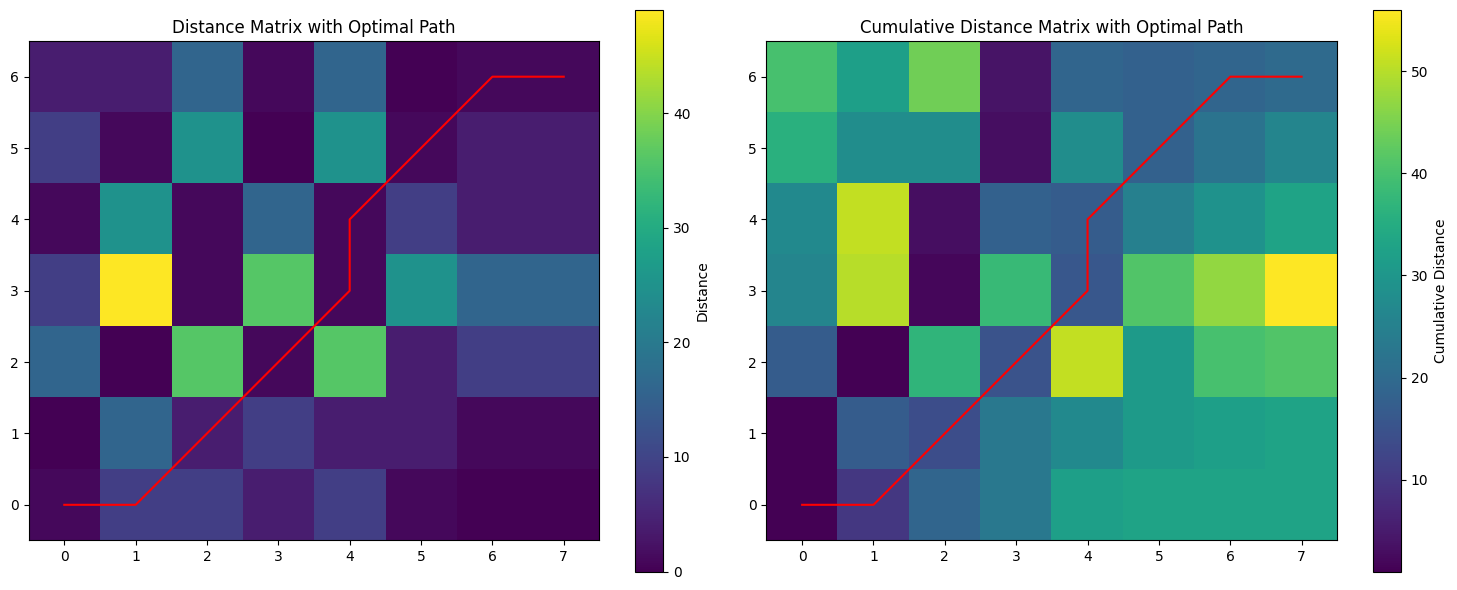

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

###########################################################
#Function to obtain the optimal distance and path between two sequences
###########################################################
def DTW(sequence1,sequence2):
    #######################################################
    # Input  : Two sequences
    # Output : DTW path and optimal distance
    #######################################################

    D = np.array([[(i - j)**2 for j in sequence1] for i in sequence2])
    M = len(sequence1)
    N = len(sequence2)

    #######################################################
    # Code snippet to create the cumulative distance matrix and finding the optimal path
    #######################################################
    # Initialize the cumulative distance matrix
    C = np.zeros_like(D)   #Cummulative distance matrix
    P = [[0] * M for _ in range(N)]
    #Iterate through the sequence of points in sequences and compute the distance between the sequences.
    for i in range(N): #you can start from 1
        for j in range(M):
            if i != 0 and j != 0:
              C[i,j] = D[i,j] + np.min(np.array([C[i-1,j],C[i-1,j-1],C[i,j-1]]))
              if C[i-1,j] <= C[i-1,j-1] and C[i-1,j] <= C[i,j-1]:
                  if C[i-1,j] == C[i-1,j-1]:
                    P[i][j] = [i-1,j-1]
                  else:
                    P[i][j] = [i-1,j]
              elif C[i-1,j-1] < C[i-1,j] and C[i-1,j-1] < C[i,j-1]:
                P[i][j] = [i-1,j-1]
              elif C[i,j-1] < C[i-1,j-1] and C[i,j-1] < C[i-1,j]:
                P[i][j] = [i,j-1]

            elif i == 0 and j != 0:
              C[0,j] = D[0,j] + C[0, j-1]
              P[0][j] = [0,j-1]
            elif i != 0 and j == 0:
              C[i,0]  = D[i,0] + C[i-1,0]
              P[i][0] = [i-1,0]
            else:
              P[0][0] = [0,0]
              continue

    optimal_path = [[N-1,M-1]]
    i = N - 1
    j = M - 1
    while i != 0 or j != 0:
      optimal_path.append(P[i][j])
      [i,j] = P[i][j]
    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################
    return C[N-1,M-1], optimal_path

def plotDTWpath(sequence1,sequence2):
    #######################################################
    # Inputs : sequence1 and sequence2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################

    #Compute distance and cumulative distance between the given templates
    D = np.array([[(i - j)**2 for j in sequence1] for i in sequence2])
    M = len(sequence1)
    N = len(sequence2)

    C = np.zeros_like(D)
    C[0,0] = D[0,0]
    for i in range(N):
        for j in range(M):
            if i != 0 and j != 0:
              C[i,j] = D[i,j] + np.min(np.array([C[i-1,j],C[i-1,j-1],C[i,j-1]]))
            elif i == 0 and j != 0:
              C[i,j] = D[i,j] + C[i, j-1]
            elif i != 0 and j == 0:
              C[i,j]  = D[i,j] + C[i-1,j]
            else:
              continue

    #Obtain the optimal path using "DTW" function
    _,optimal_path = DTW(sequence1,sequence2)

    #Plot the optimal path on distance and cumulative matrices and verify the DTW codes
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.imshow(D.T,origin = 'lower',cmap = 'viridis')
    x = []
    y = []
    for p in optimal_path:
      x.append(p[0])
      y.append(p[1])

    plt.plot(x, y, color = 'red')
    plt.title('Distance Matrix with Optimal Path')
    plt.colorbar(label = 'Distance')

    plt.subplot(1,2,2)
    plt.imshow(C.T,origin = 'lower', cmap = 'viridis')
    plt.plot(x,y, color = 'red')
    plt.title('Cumulative Distance Matrix with Optimal Path')
    plt.colorbar(label = 'Cumulative Distance')

    plt.tight_layout()
    plt.show()

A = [4,3,7,0,2,6,5]
B = [3,7,1,6,1,5,4,4]
plotDTWpath(A,B)

<b> Report your observations </b>

1.The optimal path gives the point to point correspondance between the two sequences

2.The mininum distance in this case is 20, as calculated from cumulative matrix.

3.




<dt> <h4> <b> Part (b): </b> In this part of the assignment, we expect you to build the Isolated digit recognition system with the help of the above written DTW algorithm. </dt> </h4>

![picture](https://drive.google.com/uc?export=view&id=1nGtWwbDg8PJBNwck_dUt2mmsCBshrGYc)



<dt> <h4> 1. Record one repetition each of the digits zero, one, two, three, four, five, six, seven, eight, and nine. The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes. </dt> </h4>
<dt> <h4> 2. Record three further repetitions of the same digits (Isolated words) as test data. </dt> </h4>  
<dt> <h4> 3. The codes to compute the signal's templates (Mel Frequency Cepstral Coefficients) are provided. Please use them to obtain the templates of the speech signals. </dt> </h4>  
<dt> <h4> 4. Write an algorithm to perform isolated digit recognition with the help of the DTW codes. </dt> </h4>
<dt> <h4> 5. Take two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plot the optimal DTW path on distance and cumulative distance matrices for both cases.   </dt> </h4>
<dt> <h4> 6. Evaluate the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts. </dt> </h4>
<dt> <h4> 7. Create a confusion matrix and report the most confusing digits. </dt> </h4>


**Module to record the voice in online mode**

In [5]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment
from google.colab import drive,files

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

drive.mount('/content/drive')
training_dir = '/content/drive/MyDrive/training'
testing_dir = '/content/drive/MyDrive/testing'


Mounted at /content/drive


In [7]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.io.wavfile
import io
import os
from IPython.display import Audio
import scipy.io.wavfile as wav
!pip -q install python_speech_features
!pip -q install speechpy
from python_speech_features import mfcc
import speechpy

def compute_mfcc_template(path):
  (rate,sig) = wav.read(path)
  sig=sig-np.mean(sig)
  mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,nfft = 2048,winfunc=np.hamming)
  mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
  return mfcc_feat_cmvn


def process_audio_files(dir,training):
  templates = []
  targets = []
  for audio in os.listdir(dir):
    path = os.path.join(dir, audio)
    if training:
      targets.append(int(path[-5]))
    else:
      targets.append(int(path[-7]))
    mfcc_template = compute_mfcc_template(path)
    templates.append(mfcc_template)
  return templates,targets

#### Please comment below line, if you already uploaded the 'recording.wav' in '/content/'
#!rm recording.wav

#### You can run this module in the loop to record more repetitions of the digits.
# if os.path.isfile('recording.wav'):
#     print("wavefile exists, later part of the code uses 'recording.wav' as input speech")
# else:
#     print("Recording the digits")
#     wav = record(3.0) #It will record three seconds of your speech. You can change the duration.
#     wav = wav.set_frame_rate(16000)
#     sig=wav.get_array_of_samples()
#     samples=np.array(sig).T.astype(np.float32)
#     fp_arr = np.array(samples).T.astype(np.float32)
#     fp_arr /= np.iinfo(sig.typecode).max
#     print(fp_arr.shape)
#     scipy.io.wavfile.write('recording.wav', 16000, fp_arr) #Please change the name.

# wn = Audio('recording.wav', autoplay=True)
# display(wn)

training_templates,training_targets = process_audio_files(training_dir,1)
testing_templates,testing_targets = process_audio_files(testing_dir,0)

  Preparing metadata (setup.py) ... done


**Algorithm to perform isolated digit recognition**

In [8]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

###########################################################
#Function to obtain the optimal distance and path between two templates
###########################################################
def vectorDTW(template1,template2):
    #######################################################
    # Input  : Two templates
    # Output : DTW path and optimal distance
    #######################################################

    D = np.array([[(np.linalg.norm(i-j)) for j in template1] for i in template2])
    M = len(template1)
    N = len(template2)

    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix
    C = np.zeros_like(D)   #Cummulative distance matrix
    C[0,0] = D[0,0]
    P = [[0] * M for _ in range(N)]
    #Iterate through the sequence of points in sequences and compute the distance between the sequences.
    for i in range(N): #you can start from 1
        for j in range(M):
            if i != 0 and j != 0:
              C[i,j] = D[i,j] + np.min(np.array([C[i-1,j],C[i-1,j-1],C[i,j-1]]))
              if C[i-1,j] <= C[i-1,j-1] and C[i-1,j] <= C[i,j-1]:
                  if C[i-1,j] == C[i-1,j-1]:
                    P[i][j] = [i-1,j-1]
                  else:
                    P[i][j] = [i-1,j]
              elif C[i-1,j-1] < C[i-1,j] and C[i-1,j-1] < C[i,j-1]:
                P[i][j] = [i-1,j-1]
              elif C[i,j-1] < C[i-1,j-1] and C[i,j-1] < C[i-1,j]:
                P[i][j] = [i,j-1]

            elif i == 0 and j != 0:
              C[0,j] = D[0,j] + C[0, j-1]
              P[0][j] = [0,j-1]
            elif i != 0 and j == 0:
              C[i,0]  = D[i,0] + C[i-1,0]
              P[i][0] = [i-1,0]
            else:
              P[0][0] = [0,0]
              continue

    optimal_path = [[N-1,M-1]]
    i = N - 1
    j = M - 1
    while i != 0 or j != 0:
      optimal_path.append(P[i][j])
      [i,j] = P[i][j]

    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################
    return C[N-1,M-1], optimal_path


def plotDTWpath(template1,template2):
    #######################################################
    # Inputs : template1 and template2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################

    #Compute distance and cumulative distance between the given templates

    D = np.array([[(np.linalg.norm(i-j)) for j in template1] for i in template2])
    M = len(template1)
    N = len(template2)

    C = np.zeros_like(D)
    C[0,0] = D[0,0]
    for i in range(N):
        for j in range(M):
            if i != 0 and j != 0:
              C[i,j] = D[i,j] + np.min(np.array([C[i-1,j],C[i-1,j-1],C[i,j-1]]))
            elif i == 0 and j != 0:
              C[i,j] = D[i,j] + C[i, j-1]
            elif i != 0 and j == 0:
              C[i,j]  = D[i,j] + C[i-1,j]
            else:
              continue


    #Obtain the optimal path using "DTW" function
    _,optimal_path = vectorDTW(template1,template2)

    #Plot the optimal path on distance and cumulative matrices and verify the DTW codes
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.imshow(D.T,origin = 'lower',cmap = 'viridis')
    x = []
    y = []
    for p in optimal_path:
      x.append(p[0])
      y.append(p[1])

    plt.plot(x, y, color = 'red')
    plt.title('Distance Matrix with Optimal Path')
    plt.colorbar(label = 'Distance')

    plt.subplot(1,2,2)
    plt.imshow(C.T,origin = 'lower', cmap = 'viridis')
    plt.plot(x,y, color = 'red')
    plt.title('Cumulative Distance Matrix with Optimal Path')
    plt.colorbar(label = 'Cumulative Distance')

    plt.tight_layout()
    plt.show()


**Plot the optimal DTW path**

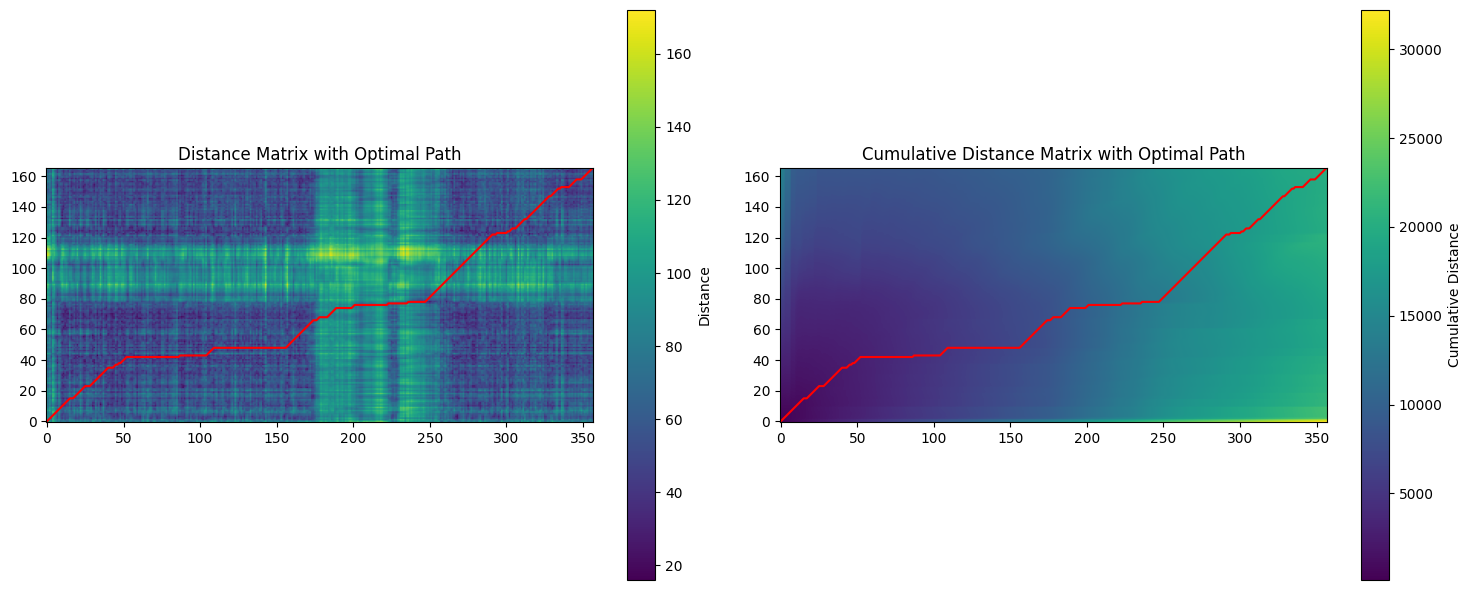

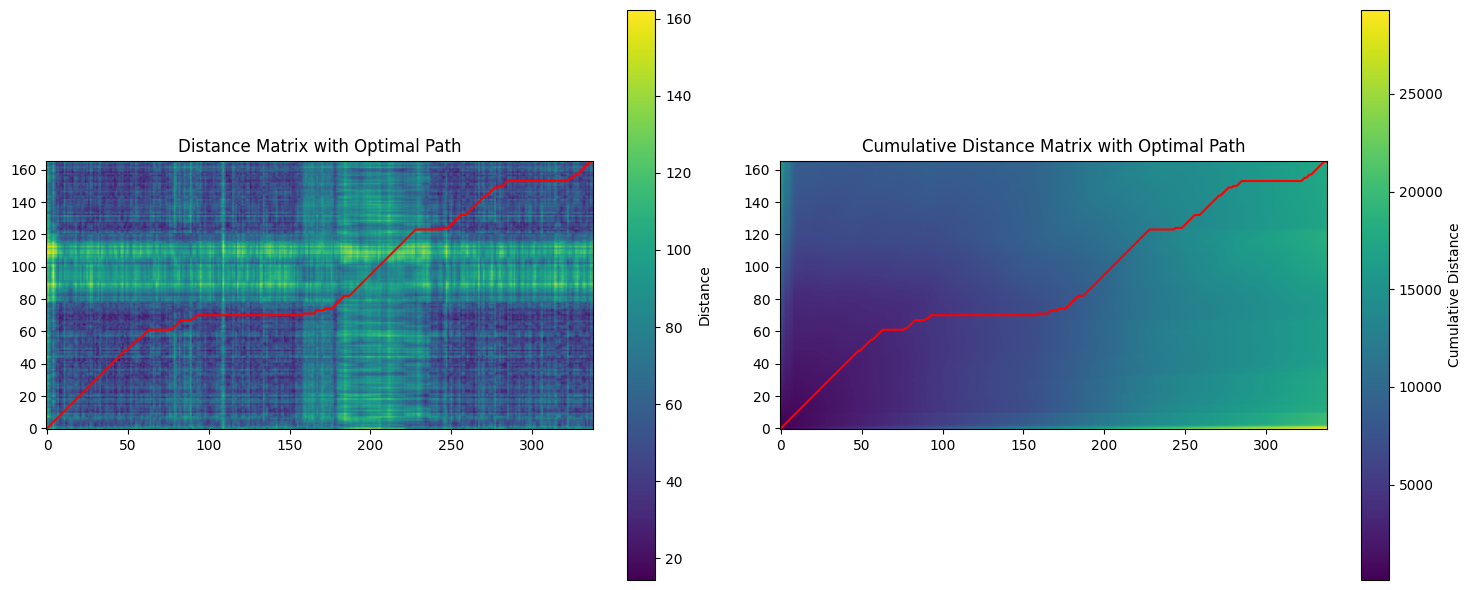

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

# t1 = training_templates[0]
# dist = []
# for i,t in enumerate(testing_templates):
#   d,_ = vectorDTW(t1,t)
#   dist.append((d,i))

# dist = sorted(dist)
# print(dist)

pair1 = (training_templates[0], testing_templates[27]) # pair 1 consisting of same audio of digits
pair2 = (training_templates[0], testing_templates[3])  # pair 2 consisting of different audio of digits

d1,_ = vectorDTW(pair1[0],pair1[1])
d2,_ = vectorDTW(pair2[0],pair2[1])

#print(d1, " ", d2)
plotDTWpath(pair1[0],pair1[1])
plotDTWpath(pair2[0],pair2[1])


**Compute the required metrics ( digit recognition accuracy ) and illustrations ( confusion matrix )**

In [23]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

count = 0
confusion_matrix = np.zeros((10,10)) # confusion_matrix
for i,t1 in enumerate(testing_templates):
  min_d = np.inf
  predicted_target = None
  for j,t2 in enumerate(training_templates):
    d,_ = vectorDTW(t2,t1)
    if d < min_d:
      min_d = d
      predicted_target = training_targets[j]

  if predicted_target == testing_targets[i]:
    count += 1

  confusion_matrix[testing_targets[i],predicted_target] += 1

print("Accuracy : ", count*100 / len(testing_targets))

# confusion matrix
print("Confusion Matrix: \n", confusion_matrix)

Accuracy :  10.0
Confusion Matrix: 
 [[0. 0. 0. 0. 0. 2. 1. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 2.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 2.]
 [0. 0. 0. 0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0. 0. 0. 0. 0.]]


<b> Report your observations </b>

1.Due to noisy audios, the accuracy is 10%

2.As seen from the confusion matrix , the most confusing digit is 6 as most of the digits is being predicted as 6.

3.The accuracy depends upon the quality of audio signals recorded.




<dt> <h4> <b> Part (c): </b> In this part of the assignment, we expect you to evaluate the above-written digit recognition system performance on different test cases and understand the pros and cons of the DTW algorithm.  </dt> </h4>

[link to TDIGITS data](https://drive.google.com/drive/folders/1oV3jrUiug0-SwWLOdLtbXA6hzqYYIlI7?usp=sharing)


<dt> <h4> 1. Evaluate the performance of digit recognition systems on the TDGIT database shared with you and report the accuracy. </dt> </h4>
<dt> <h4> 2. Evaluate the performance in different cases, i.e., a pair of templates with the same speaker and a different speaker. </dt> </h4>
<dt> <h4> 3. Please report some of the changes to improve the system performance. </dt> </h4>

In [9]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
import os

def process_audio_files1(dir,speaker):
  templates = []
  targets = []
  for audio in os.listdir(dir):
    path = os.path.join(dir, audio)
    if speaker == 'theo':
      if path[-12] != '_':
        targets.append(int(path[-12]))
      else:
        targets.append(int(path[-13]))
    elif speaker == 'jackson' or speaker == 'nicolas':
      if path[-15] != '_':
        targets.append(int(path[-15]))
      else:
        targets.append(int(path[-16]))
    elif speaker == 'yweweler':
      if path[-16] != '_':
        targets.append(int(path[-16]))
      else:
        targets.append(int(path[-17]))
    mfcc_template = compute_mfcc_template(path)
    templates.append(mfcc_template)
  return templates,targets


theo = '/content/drive/MyDrive/theo'
jackson = '/content/drive/MyDrive/jackson'
nicolas = '/content/drive/MyDrive/nicolas'
yweweler = '/content/drive/MyDrive/yweweler'

theo_templates,theo_targets = process_audio_files1(theo,'theo')
jackson_templates,jackson_targets = process_audio_files1(jackson,'jackson')
nicolas_templates,nicolas_targets = process_audio_files1(nicolas,'nicolas')
yweweler_templates,yweweler_targets = process_audio_files1(yweweler,'yweweler')

In [22]:
#Performance evaluation of Isolated digit recognition system on TDIGITS data

#Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from the same speaker
training_templates_jackson = []
training_targets_jackson = []
testing_templates_jackson = []
testing_targets_jackson = []

count = np.zeros(10)
for i, t in enumerate(jackson_templates):
  if count[jackson_targets[i]] == 0:
    training_templates_jackson.append(t)
    training_targets_jackson.append(jackson_targets[i])
    count[jackson_targets[i]] = 1
  else:
    testing_templates_jackson.append(t)
    testing_targets_jackson.append(jackson_targets[i])

count = 0
for i,t1 in enumerate(testing_templates_jackson):
  min_d = np.inf
  predicted_target = None
  for j,t2 in enumerate(training_templates_jackson):
    d,_ = vectorDTW(t1,t2)
    if d < min_d:
      min_d = d
      predicted_target = training_targets_jackson[j]

  if predicted_target == testing_targets_jackson[i]:
    count += 1

print("Accuracy when reference and test signal are same: ", count*100 / len(testing_targets_jackson))

#Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from different speakers
count = 0
for i,t1 in enumerate(theo_templates):
  min_d = np.inf
  predicted_target = None
  for j,t2 in enumerate(training_templates_jackson):
    d,_ = vectorDTW(t1,t2)
    if d < min_d:
      min_d = d
      predicted_target = training_targets_jackson[j]

  if predicted_target == theo_targets[i]:
    count += 1

print("Accuracy when reference and test signal are different: ", count*100 / len(testing_targets_jackson))
#Suggest some of the changes to improve the system performance.


Accuracy when reference and test signal are same:  71.0204081632653
Accuracy when reference and test signal are different:  22.040816326530614


<b> Report your observations </b>

1.The accuracy in case of jackson's audio signal is 71 % where reference and testing signals both are same and of jackson's.

2.While in the case of testing signals of theo and reference signals of jackson, the accuracy comes out to be 22 %.

3.This shows, that if the speaker changes, DTW algorithm may not give accurate results.

